# Logistical Regression Analysis:

### Covers data loading, preprocessing, exploratory data analysis, feature selection, model training, evaluation,  result interpretation and prediction for a new input.

**Introduction**
This project aims to predict whether it will rain tomorrow in Australia based on historical weather data using a logistic regression model.

**Dataset context**
This dataset sourced from kaggle contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means, did it rain the next day - Yes or No?
This column is Yes if the rain for that day was 1mm or more.

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [350]:
# Import necessary libraries for data analysis and modeling

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualisation
import seaborn as sns  # For enhanced data visualisation

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature standardisation
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation

In [351]:
# Load the dataset
df = pd.read_csv('WeatherAUS.csv')

In [352]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [353]:
df.shape

(145460, 23)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [355]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Handle missing values
for column in columns_with_missing:
    # Numerical columns: impute with mean
    if df[column].dtype == 'float64':
        imputer = SimpleImputer(strategy='mean')
        df[column] = imputer.fit_transform(df[[column]])
    # Categorical columns: impute with mode
    else:
        imputer = SimpleImputer(strategy='most_frequent')
        df[column] = imputer.fit_transform(df[[column]])

# Verify that all missing values have been handled
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [356]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [357]:
df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

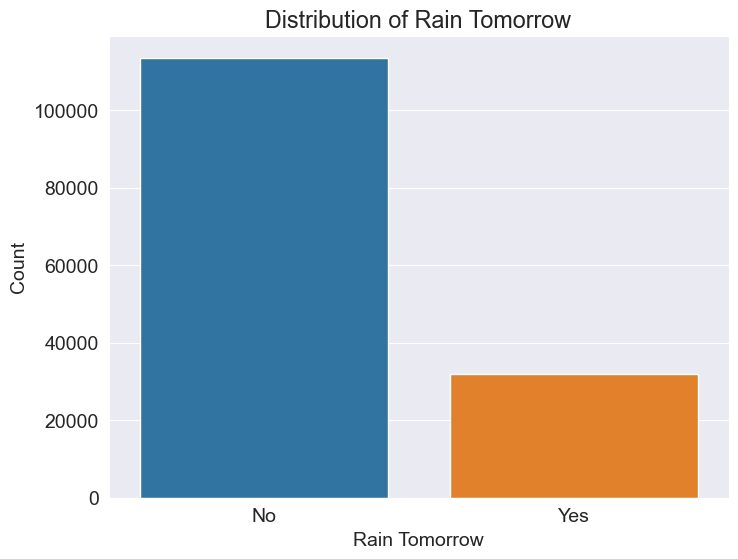

In [358]:
# Visualise the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainTomorrow')
plt.title('Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

In [359]:
# Summary Statistics of Selected Numerical Features
selected_numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm']
df[selected_numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,68.880831,51.539116
std,6.365750,7.088124,8.382488,13.118253,18.854765,20.471189
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,57.000000,37.000000
50%,12.100000,22.700000,0.000000,39.000000,69.000000,51.539116
75%,16.800000,28.200000,1.000000,46.000000,83.000000,65.000000
max,33.900000,48.100000,371.000000,135.000000,100.000000,100.000000


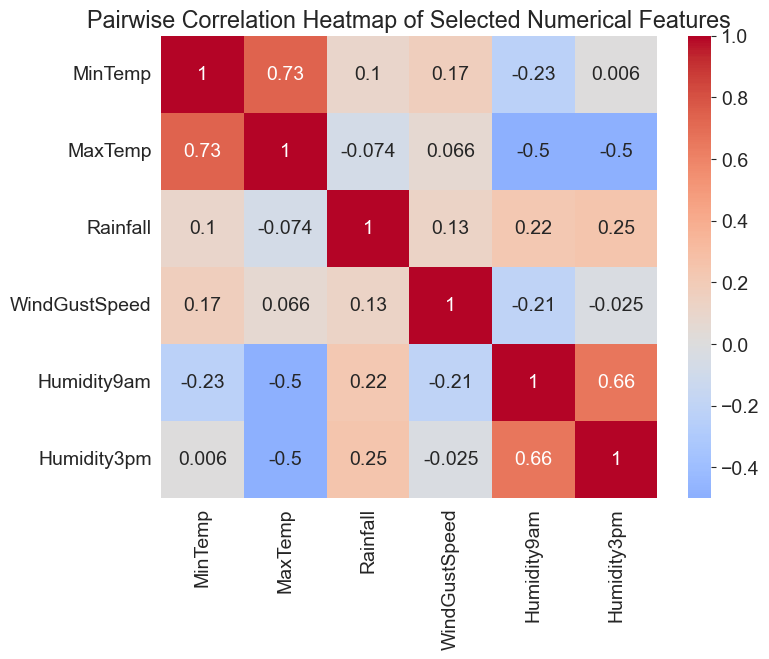

In [360]:
# Pairwise Correlation Heatmap of Selected Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Pairwise Correlation Heatmap of Selected Numerical Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

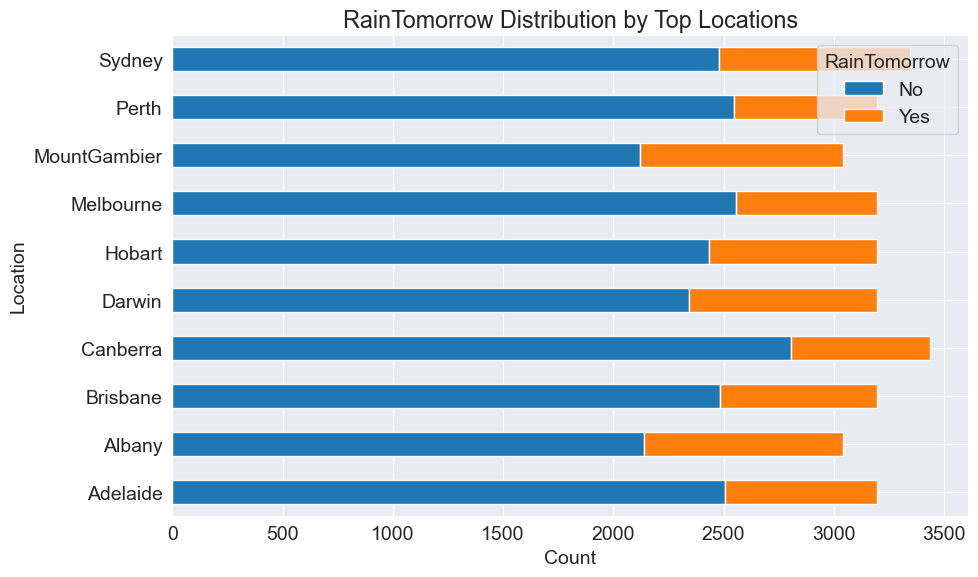

In [361]:
# Select top 10 locations with the highest counts
top_locations = df['Location'].value_counts().head(10).index

# Filter the DataFrame for top locations
top_location_df = df[df['Location'].isin(top_locations)]

# Visualize the distribution of RainTomorrow across top locations
plt.figure(figsize=(10, 6))
location_rain_distribution = top_location_df.groupby(['Location', 'RainTomorrow']).size().unstack()
location_rain_distribution.plot(kind='barh', stacked=True)
plt.title('RainTomorrow Distribution by Top Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.legend(title='RainTomorrow')
plt.tight_layout()
plt.show()


# Training and Testing Data

In [362]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm']

In [363]:
# Prepare the data
X = df[features]
y = df['RainTomorrow']

In [365]:
# Convert the categorical target of 'RainTomorrow' to binary (0 or 1)
# The purpose of this operation is to prepare the target variable in a format that's suitable for
# binary classification models. 
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

df['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [366]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [367]:
# Standardise the features for better model performance

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

**A StandardScaler makes sure all the features have similar ranges so the model can work better. It transforms the data to have an average of 0 and a standard deviation of 1. We use the same transformation on the test data to keep things consistent**

# Training the Model and Evaluation

In [368]:
# Model Training and Evaluation
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [369]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8326687749209405


**The model correctly predicts whether it will rain tomorrow around 83.27% of the time based on the features**

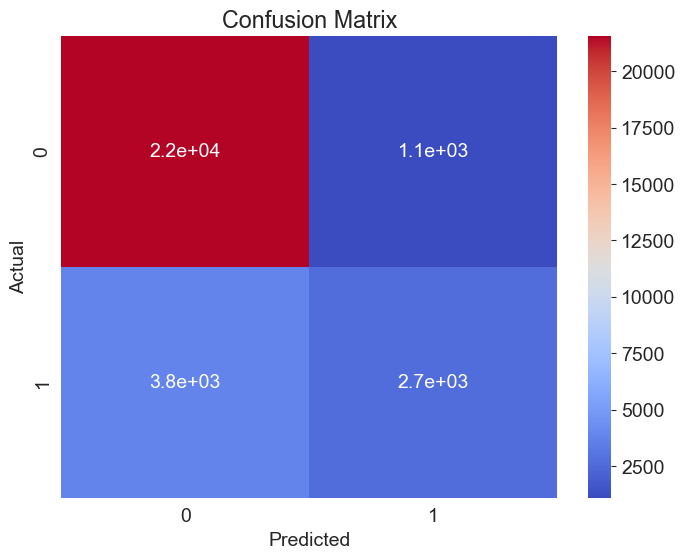

In [370]:
# Confusion Matrix - this looks for false/true positives and negatives - ranging from -1 to 1.
# [[True Negative (TN)  False Positive (FP)]
# [False Negative (FN) True Positive (TP)]]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [371]:
# Model Evaluation with Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=['No Rain', 'Rain'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     No Rain       0.85      0.95      0.90     22672
        Rain       0.71      0.41      0.52      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.68      0.71     29092
weighted avg       0.82      0.83      0.82     29092



**Precision is the percentage of predicted positives that are actually positive.
Recall is the percentage of actual positives that are predicted positive.
F1-score is a weighted harmonic mean of precision and recall.**

The overall precision, recall, and F1-score are 0.90, 0.83, and 0.86, respectively. This means that the model is able to correctly predict the class of 90% of the data points, and it is able to identify 83% of the positive data points.

The table also shows that the precision for the No Rain class is higher than the precision for the Rain class. This means that the model is more likely to correctly predict that there will be no rain than it is to correctly predict that it will rain.

The recall for the Rain class is lower than the recall for the No Rain class. This means that the model is more likely to miss a case of rain than it is to miss a case of no rain.

Overall, the classification report shows that the model is performing well. However, there is still room for improvement, especially in the recall for the Rain class.

# Given the features today. will it rain tomorow:

In [376]:
# Define the new input features as a dictionary for conditions of a given day
new_input = {'MinTemp': 23.2, 'MaxTemp': 33.2, 'Rainfall': 10.2,
             'WindGustSpeed': 52.0, 'Humidity9am': 89.0, 'Humidity3pm': 58.0}

# Create a NumPy array from the dictionary values
new_input_np = np.array(list(new_input.values())).reshape(1, -1)

# Make predictions on the new input
prediction = model.predict(new_input_np)

if prediction == 1:
    print('Yes, it will rain tomorrow.')
else:
    print('No, it will not rain tomorrow.')

No, it will not rain tomorrow.


# Conclusion

In [381]:
# Conclusion
print("\nConclusion:")
print("This data science project provides valuable insights into predicting rainfall for the following day based on historical weather data.")
print("The logistic regression model, with an accuracy of {:.2f}%, shows potential in making reasonable predictions.".format(accuracy * 100))
print("However, further analysis would be required, including exploring additional features and investigating the reasons behind false positives and false negatives.")
print("By addressing these aspects, the model's reliability can be improved, making it more suitable for real-world applications.")


Conclusion:
This data science project provides valuable insights into predicting rainfall for the following day based on historical weather data.
The logistic regression model, with an accuracy of 83.27%, shows potential in making reasonable predictions.
However, further analysis would be required, including exploring additional features and investigating the reasons behind false positives and false negatives.
By addressing these aspects, the model's reliability can be improved, making it more suitable for real-world applications.
